---
title: Statistical Learning Theory
layout: collection
permalink: /Machine-Learning/Statistical-Learning-Theory
collection: Machine-Learning
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
  - machine-learning 
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Frequentist Decision theory

Let $\mathbf{x}$ be an i.i.d generated sample from an unknown pdf $\mathbb{P}^\*(\mathbf{x})$ and the output values $y$ be from the unknown conditional pdf $\mathbb{P}^\*(y | \mathbf{x})$.
The language model is then trained on a set of observed pairs drawn from the true unknown pdf given by $\mathbb{P}^\*(\mathbf{x}, y)$.
With this we get our data $\mathcal{D}=\{(\mathbf{x}_1, y_1),...\} \overset{i.i.d}{\sim} \mathbb{P}^\*(\mathbf{x}, y)$. 
We assume here that $\mathbf{x}$ is observable, but $y$ isn't. 
We then consider an estimator $\delta(\mathcal{D})$, which is defined as a prediction function $\hat{y} = f\_{\mathcal{D}}(\mathbf{x})$.
Since the data is random, so is the estimator, meaning the estimator is a RV. 
We can thus compare the estimates class membership with the true label via a loss function $L(y, f(\mathbf{x})$.
The expected risk is then the average loss with respect to the true unknown joint distribution $\mathbb{P}^*(\mathbf{x}, y)$, or it can be thought of as expectable error. 

$$
R(f, \mathbb{P}^*) 
= 
\mathbb{E}_{\mathbb{P}^*(\mathbf{x}, y)}L(y, f(\mathbf{x}) 
= 
\mathbb{E}_{\mathbb{P}^*(\mathbf{x})} \mathbb{E}_{\mathbb{P}^*(y | \mathbf{x})} L(y, f(\mathbf{x})
$$

Because the expected risk itself depends on the unknown distribution $\mathbb{P}^*$, and we don't know the true nature of $\mathbb{P}^*$ we cannot calculate this risk directly. We can approximate it with the so called emperical distribution for the n observed samples in $\mathcal{D}$:

$$
\mathbb{P}_{\mathcal{D}}(\mathbf{x}, y | \mathcal{D}) = \frac{1}{n} \sum_{(\mathbf{x}_i, y_i) \in \mathcal{D}} \delta({\mathbf{x} - \mathbf{x}_i) \delta(y,y_i)
$$

The emperical risk, which is the sample average of the loss is then given by 

$$
R_{emp}(f | \mathcal{D}) = \frac{1}{n} \sum_{i=1}^n L(y_i, f(\mathbf{x}_i))
$$

# Hypothesis space

The best possible risk is defined as $\text{inf}_f R[f]$. Because we often have to restrict our function space, thus our hypothesis space $\mathcal{H}$, which is only a subset of the true space. 
In our given hypothesis space we define $f^*$ as the best possible function that can be implemented by a machine.

$$
f^* = \arg \min_{f \in  \mathcal{H}}
$$

We also denote $f_{\mathcal{D}} \in \mathcal{H}$ as the empirical risk minimizer on a sample $\mathcal{D}$

$$
f_n = f_{\mathcal{D}} = \arg \min_{f \in \mathcal{H}} R_{emp}(f | \mathcal{D})
$$

# Convergence

SLT gives then results for bounding the error on the unseen data, given the training data. Thus a relation between the past ($\mathcal{D}$) and the future (unseen data). In SLT all samples are i.i.d. We can bound the risk which with a probability of $1 - \delta$ holds with $a, b > 0$:

$$

R[f_n] \leq R_{emp} + \sqrt{\frac{a}{n}\left( \text{capacity}(\mathcal{H}) + \ln \frac{b}{\delta} \right)}

$$

Ont he covnerge of RV themselves, we say that X_n converges in probability to the random variable X as $n \rightarrow \infty$, iff, for all $\epsilon > 0$, 

$$
\mathbb{P}(|X_n - X| > \epsilon) \rightarrow 0, \text{as } n \rightarrow \infty
$$

We define this as $X_n \overset{p}{\rightarrow} X$ as $n \rightarrow \infty$.

# Binary classification

In general here we only look at the binary case where $f : X \rightarrow \{-1, 1\}$ with $L(y, f(\mathbf{x}) = \frac{1}{2}|1 - f(\mathbf{x})y|$. 
The hypothisis space is then $\mathcal{H}' = \{f' = \text{sign}(f) | f \in \mathcal{H}\}$

# Consistency of Emperical risk minimizations (ERM)

The principle of ERM is consistent if for any $\epsilon > 0$, 

$$
\lim_{n \rightarrow \infty} \mathbb{P}(|R[f_n] - R[f^*]| > \epsilon) = 0
$$

and 

$$
\lim_{n \rightarrow \infty} \mathbb{P}(|R_{emp}[f_n] - R[f_n]| > \epsilon) = 0
$$

Meaning that for $n \rightarrow \infty$ for the first case, the probability fo the true risk $R[f_n]$ deviating from the best possbile risk $R[f^*]$ in our hypothisis space becomes zero, which means that the true risk of $f_n$ converges to the risk of the best possible function. 
The seconds case describes that the emperical risk, which is estimated from the data converges to it's true risk. 

![consistency erm](consistency_ERM.png)

Only the condition $\mathbb{P}(|R_{emp}[f] - R[f^*]|)$ does not suffice as a condition for consistency.

# Hoeffding's inequality

With Hoeffding's inequality we are able to bound our probability.
Let $\xi_i , i \in [0, n]$ be independent instances of a bounded RV $\xi$, with values in $[a, b]$. Denote their average by $ Q_n = \frac{1}{n} \sum_{i} \xi_i $. Then for any $ \epsilon > 0 $ we get:

$$
\begin{rcases}
\mathbb{P}(Q_n - \mathbb{E}(\xi) \geq \epsilon) \\
\mathbb{P}(\mathbb{E}(\xi) - Q_n \geq \epsilon)
\end{rcases}
\leq \exp \left( -\frac{2n\epsilon^2}{(b - a)^2} \right)
$$  

and 

$$
\mathbb{P}(|Q_n - \mathbb{E}(\xi)| \geq \epsilon) \leq 2 \exp \left( - \frac{2n\epsilon^2}{(b - a)^2} \right)
$$

Looking at our binary classification, we define $\xi$ to be a 0/1 loss function

$$
\xi = \frac{1}{2}|1 - f(\mathbf{x})y| = L(y, f(\mathbf{x}))
$$

Then we get that $ Q_n[f] = \frac{1}{n} \sum_{i=1}^{n} \xi_i = \frac{1}{n} \sum_{i=1}^{n} L(y_i, f(\mathbf{x}_i)) = R_{emp}[f] $ and $ \mathbb{E}[\xi] = \mathbb{E}[L(y, f(\mathbf{x}))] = R[f] $.
becuase $\xi_i$ are independent instances of a bounden RV $\xi$ with values in [0, 1] we get

$$
\mathbb{P}(|R_{emp}[f] - R[f]| > \epsilon) \leq 2 \exp \left( -2n\epsilon^2 \right)
$$

With this, the hoeffding's inequality gives us a rate of convergence for any fixed function. 
This doesn't tell us that $ \mathbb{P}(|R_{emp}[f_n] - R[f_n]| > \epsilon) \leq 2\exp \left(- 2n\epsilon^2 \right) $, because $f_n$ is not a fixed function. $f_n$ depends on the data $ \mathcal{D} $. 
Because $f_n$ is chosen to minimize the emperical risk, it may change with inceasing n so it is not a fixed function, therefor the hoeffding's inequality cannot be applied to this convergence.
For each fixed function $f$, we get $R_{emp}[f] \xrightarrow[n \rightarrow \infty]{P} R[f]$, meaning that the emperical risk converges to the true expected risk for a function as $n \rightarrow \infty$ (point wise convergence).

# Conditions for consistency

Let

$$
\begin{align*}
    f_n &:= \arg \min_{f \in \mathcal{H}} R_{emp}[f] \\
    f^* &:= \arg \min_{f \in \mathcal{H}} R[f] \\
\end{align*}
$$
then
$$
\begin{align*}
    R[f] - R[f^*] &\geq 0, \ \forall f \in \mathcal{H} \\
    R_{emp}[f] - R_{emp}[f_n] &\geq 0, \ \forall f \in \mathcal{H}
\end{align*}
$$

For first case, because $f^*$ is the function that minimizes the expected risk for all functions in the hypothisis space, any function in the hypothisis space has an equal or higher risk compared to $f^*$. 
For the second case, because $f_n$ is the function that minimizes the emperical risk for all functions in the hypothisis space, any function in the hypothisis space has an equal or higher emperical risk compared to $f_n$. 
Because this holds for any function $f \in \mathcal{H}$, we set $f = f_n$ for the first case and $f = f^*$ for the second one.
$$
\begin{align*}
    R[f_n] - R[f^*] &\geq 0 \\
    R_{emp}[f^*] - R_{emp}[f_n] &\geq 0
\end{align*}
$$

We can then write

$$
\begin{align*}
    0 
    &\leq 
    R[f_n] - R[f^*] + R_{emp}[f^*] - R_{emp}[f_n] \\
    &=
    R[f_n] - R_{emp}[f_n] + R_{emp}[f^*] - R[f^*] \\
    & \leq
    \sup_{f \in \mathcal{H}}(R[f] - R_{emp}[f]) + R_{emp}[f^*] - R[f^*] \\
\end{align*}
$$

If we assume that $\sup_{f \in \mathcal{H}}(R[f] - R_{emp}[f]) \xrightarrow[n \rightarrow \infty]{P} 0 $ (one sided uniform convergence over all functions in the hypothisis space) then:

$$
\sup_{f \in \mathcal{H}}(R[f] - R_{emp}[f]) + R_{emp}[f^*] - R[f^*] \xrightarrow[n \rightarrow \infty]{P} 0
$$

Which then means that by this assumption, this is a sufficient condition for consistency because the assumption implies the consistency of the ERM. 
Because by this assumption the terms all converge to zero which gives the consistency requirements stated above. By assumption we then have 

$$
\underbrace{R[f_n] - R[f^*]}_{\text{1. Consistency}} + R_{emp}[f^*] - R_{emp}[f_n] \xrightarrow[n \rightarrow \infty]{P} 0 \quad \text{by Assumption} \\
$$
Which means that the first term has to converge to zero.

$$
\phantom{R[f_n]} - R[f^*] + R_{emp}[f^*]  \phantom{-R_{emp}[f_n]} \xrightarrow[n \rightarrow \infty]{P} 0 \quad \text{by Hoeffding's inequality}\\
R[f_n] \phantom{- R[f^*] + R_{emp}[f^*]} - R_{emp}[f_n] \xrightarrow[n \rightarrow \infty]{P} 0 \quad \text{2. Consistency} \\
$$

Then because of our assumption, both consistency requirements are met for the ERM.

Let $\mathcal{H}$ be a set of functions with bounded loss for the distribution $F(x, y)$, $A \leq R[f] \leq B, \ \forall f \in \mathcal{H}$. 
For the ERM principle to be consistent, it is necessary and sufficient that 
$$ 
\lim_{n \rightarrow \infty} \mathbb{P}(\sup_{f\in \mathcal{H}} (R[f] - R_{emp}[f]) > \epsilon) = 0, \ \forall \epsilon > 0
$$


# The key theorem of learning theory

The key theorem asserts that any analysis of the convergence of ERM must be a worst case analysis. We now would like to look at simple hypothesis spaces and ask, are there simple hypothesis spaces for which consistency is guaranteed and what can we say about only finite sample sizes? 

Assume the set $ \mathcal{H}$ contains only 2 functions.

$$
\mathcal{H} = \{f_1, f_2\}
$$

Let 

$$
C_{\epsilon}^i := \{(x_1, y_1), ..., (x_n, y_n)| R[f_i] - R_{emp}[f_i] > \epsilon \}
$$

be the set of samples for which the risks of $f_i$ differ by more than $\epsilon$. By the Hoeffding's inequality we get

$$
\mathbb{P}(C_{\epsilon}^i) \leq \exp(-2n\epsilon^2)
$$

The union bound, i.e. the bound on the hypothesis space is given by

$$
\mathbb{P}(\sup_{f \in \mathcal{H}}(R[f] - R_{emp}[f] > \epsilon)) 
= 
\mathbb{P}(C_{\epsilon}^1 \cup C_{\epsilon}^2) 
= 
\mathbb{P}(C_{\epsilon}^1) + \mathbb{P}(C_{\epsilon}^2) - \mathbb{P}(C_{\epsilon}^1 \cap C_{\epsilon}^2) 
\leq
\mathbb{P}(C_{\epsilon}^1) + \mathbb{P}(C_{\epsilon}^2) 
\leq
2 \exp(-2n\epsilon^2)
$$

Assuming then now that $ \mathcal{H}$ contains a finite number of functions $ \mathcal{H} = \{ f_1, ..., f_N \}$.
Then again by the union bound we get

$$
\mathbb{P}(\cup_{i=1}^N C_{\epsilon}^i) \leq \sum_{i=1}^N \mathbb{P}(C_{\epsilon}^i) \leq N \exp(-2n\epsilon^2)
$$

Which then gives

$$
\mathbb{P}(\sup_{f \in \mathcal{H}}(R[f] - R_{emp}[f] > \epsilon)) \leq N \exp(-2n\epsilon^2) = \exp(ln N - 2n\epsilon^2)
$$

Which means that for a finit hypothesis space the ERM is consistent. 
Thus we can bound the test error for the function which minimizes the emperical risk.

$$
\mathbb{P}(R[f_n] - R_{emp}[f_n] > \epsilon) \leq \exp(ln N - 2n\epsilon^2)
$$

We can then derive a confidence interval

$$
\mathbb{P}(R[f_n] - R_{enp}[f_n] > \epsilon) \leq \exp(ln N - 2n\epsilon^2) =: \delta(\epsilon) \\
\mathbb{P}(R[f_n] - R_{enp}[f_n] \leq \epsilon) \geq 1 - \delta(\epsilon)
$$

With probability at least $1 - \delta$ it holds that

$$
R[f_n] \leq R_{emp}[f_n] + \epsilon(\delta) \Rightarrow R[f_n] \leq R_{emp}[f_n] + \sqrt{\frac{a}{n} \left( ln N + ln \frac{b}{\delta} \right) }
$$

with $a = 1/2$ and  $b = 1$.

$$
\exp \left( ln N - 2n\epsilon^2 \right) = \delta \Rightarrow-2n\epsilon^2 =  ln \delta - ln N \Rightarrow \epsilon = \sqrt{\frac{1}{2n} \left( ln N - ln \delta \right)} = \sqrt{\frac{1}{2n} \left( ln N + ln \frac{1}{\delta} \right)}
$$

Here then $ln N = \text{Capacity}(\mathcal{H})$. The bound on the risk then only depdends on $ \mathcal{H}$ and $n$.

# Infinite

We note that $R_{emp}[f]$ refers only to a finite class, that is for $n$ sample points $x_1, ..., x_n$, the functions $f \in \mathcal{H}$ can take at most $2^n$ different values $y_1, ..., y_n$.
Thus eventhough our space $ \mathcal{H}$ is infinite, because we only have $n$ sample points, many functions give the same values $y_1, ..., y_n$.

## Shattering Coefficient

Let a sample $Z_n := \{(x_1, y_1), ..., (x_n, y_n) \}$ be given. Denote by $ \mathcal{N}(\mathcal{H}, Z_n) $ the cardinality of $\mathcal{H}$ when restricted to $\{x_1, ..., x_n \}$, $\mathcal{H}|Z_n$, i.e. the number of functions from $ \mathcal{H} $ that can be distinguished on the given sample. The shattering Coefficient is the maximum number of ways into which $n$ point can be classified bny the function class 

$$
\mathcal{N}(\mathcal{H}, n) = \max_{Z_n} \mathcal{N}(\mathcal{H}, Z_n)
$$

Since $f(x) \in  \{-1, 1\}, \mathcal{N}(\mathcal{H}, n)$ is finite.

$$
\mathcal{N}(\mathcal{H}, Z_n) \leq \mathcal{N}(\mathcal{H}, n) \leq 2^n
$$

Because we're in the infinite case we want to find another way to express our capacity measure $ \mathcal{H} $.
Because $ \mathcal{N}(\mathcal{H}, Z_n) \leq \mathcal{N}(\mathcal{H}, n)$, depends on the sample itself ($Z_n$) and $\mathcal{N}(\mathcal{H}, n) \leq 2^n$ is a too loose bound we want a more strict bound.
The dependency on the sample can be removed by averaging over all samples $ \mathbb{E}\left[ \mathcal{N}(\mathcal{H}, Z_n) \right]$.

* ***Theorem (Vapnik and Chervonenkis)***
*Let $Z_{2n} = ((x_1, y_1), ..., (x_{2n}, y_{2n})$ be a sample of size $2n$. For any $\epsilon > 0$ it holds that*

$$
\mathbb{P}(\sup_{f \in \mathcal{H}}(R[f] - R_{emp}[f]) > \epsilon) \leq 4 \exp \left( ln \mathbb{E}[\mathcal{N}(\mathcal{H}, Z_{2n}) ] - \frac{n \epsilon^2}{8} \right)
$$

If then $ ln \mathbb{E}[ \mathcal{N}(\mathcal{H}, Z_{2n})]$ grows sublinearly, we get a nontrivial bound.

This bounds holds uniformly for all functions in $ \mathcal{H} $. 
Thus we can use it for functions that minimize $R_{emp}$ and can bound the test error.

$$
\mathbb{P}(R[f_n] - R_{emp} > \epsilon) \leq 4 \mathbb{E}[\mathcal{N}(\mathcal{H}, Z_{2n})] \exp \left( - \frac{n \epsilon^2}{8} \right)
$$ 

From which we can then derive a confidence interval

$$
R[f_n] \leq R_{emp}[f_n] + \sqrt{ \frac{8}{n} \left( ln \mathbb{E}[\mathcal{N}(\mathcal{H}, Z_{2n})] + ln \frac{4}{\delta} \right) }
$$

This bound depends on $ \mathcal{H}$, $n$ and $ \mathbb{P}(Z) $, which is the probability of the underlying distribution, which we don't know.

# VC-Dimension

The growth function is defined as 

$$
\mathcal{G}_{\mathcal{H}}(n) = ln[\max_{Z_n} \mathcal{N}(\mathcal{H}, Z_n)] = ln \mathcal{N}(\mathcal{H}, n)
$$

Which gives us an upper bound on the expectation.

1.  **VC - Dimension Definition**

*The VC-Dimension $h$ of a class $ \mathcal{H} $ is the largest $n$ such that $ \mathcal{N}(\mathcal{H}, n) = 2^n $, or equivalently $ \mathcal{G}_{\mathcal{H}}(n) = n ln 2 $*

By this the VC-Dimension is the maximal number of samples that can be classified in all $2^n$ possible ways.

For the space of linear functions $ \mathcal{H} = \{ ax + b | a, b, x \in \mathbb{R} \} $ we get that on point is logically seperable, 2 points aswell, 3 points also but for 4 points there exist arrangements which can not be seperated by linear funcions.
The VC-Dimension of the linear functions is then 3.

2. **Theorem (Vapnik & Chervonenkis)**

*Let $ \mathcal{H} $ be a class of functiosn with finite VC-Dimension $h$. Then for $n \leq h$, $ \mathcal{G}_{\mathcal{H}}(n)$ grows linearly with the sample size, and for all $n > h$ we get*

$$
\mathcal{G}_{\mathcal{H}}(n) \leq h \left( ln \frac{n}{h} + 1 \right)
$$

C:\Users\mathi\AppData\Local\Temp\ipykernel_18944\1361173057.py:4: RuntimeWarning: divide by zero encountered in log
  growth = h * (np.log(n / h) + 1)


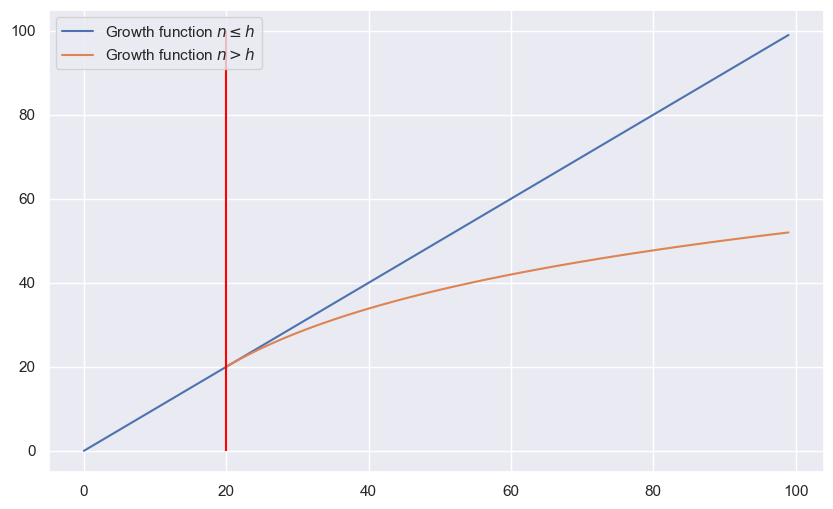

In [7]:
n = np.arange(0, 100, 1)

h = 20
growth = h * (np.log(n / h) + 1)

plt.figure(figsize=(10, 6))
plt.plot(n, n, label=r'Growth function $n \leq h$')
plt.plot(n[h:], growth[h:], label=r'Growth function $n > h$')
plt.vlines(ymin=0, ymax=100, x=h, colors='red')
plt.legend()
plt.show()

Now because or growth function was an upper bound on the logarithmic expectation of the Shattering coefficient of the function space $ \mathcal{H} $ and sample size we get the new upper bound

$$
ln \mathbb{E}[\mathcal{N}(\mathcal{H}, Z_{2n}) ] \leq \mathcal{G}_{\mathcal{H}}(n) \leq h \left( ln\frac{n}{h} + 1 \right)
$$

This if our VC-Dimension is finite, i.e. $h <  \infty$ we get non trivial bounds.

1. **Dimensional space and VC Theorem**

*The VC-Dimension of linear functions in $d$-dimensional space is $d+1$, i.e. a linear function on $ \mathbb{R}^d $ has a VC-dimension of $d+1$*.

# Canonical Hyperplanes

When using a basis function (kernel like Gaussian RBF) our feature space becomes infinite which then makes our VC-Dimension infinite. 
This causes our upper bound on the risk to become useless but even in infinite dimensional space learning is still possible.

Instead of looking at all linear functions in the infinite dimensional space we restrict ourselves to functions which give a good classification of the samples. 
A good classification is then classified by hyperplanes having a large classification margin, i.e. $r = f(\mathbf{x})/||\mathbf{w}||$. 
The capacity of the subset of hyperplanes with large classification margin can be much smaller than the general VC-Dimension of all hyperplanes. 
(In the case of an infinite VC-Dimensional function space, there may still exist subsets in this space which have a finite VC-Dimension).
The problem with normal hyperplanes is that they are not unique, i.e. the weight vector $ \mathbf{w} $ can be multiplied by any non-zero constant.
We rescale our hyperplane to canonical hyperplanes where $\min_{i=1, ..., n} |\mathbf{w}^T \mathbf{x}_i + w_0|$ = 1. The distance between the closest point and the hyperplane is then just $r = 1 / ||\mathbf{w}||$.

1. **Canonical Hyperplane Theorem**

*Let R be the radius of the smalles ball containing the points $ \mathbf{x}_1, ..., \mathbf{x}_n $: $B_r(\mathbf{a}) = \{ \mathbf{x} \in \mathbb{R}^d : ||\mathbf{x} - \mathbf{a}|| < R, \mathbf{a} \in \mathbb{R}^d \}$. 
The set of canonical hyperplane decisions functions $f(\mathbf{w}, w_0) = sign\{\mathbf{w}^T \mathbf{x} + w_0 \}$ satisfying $||\mathbf{w}|| \leq A$ has VC-Dimension $h$ bounded by* 

$$
h \leq R^2 A^2 + 1
$$

This has the consequence that independent of the dimension of the underlying space, the VC-Dimension is upper bounded and thus finite. If we then maximize the margin ($r = 1 / ||\mathbf{w}||$), meaning we minimize $||\mathbf{w}||$, we then minimize our $\text{Capacity}(\mathcal{H})$. Minimizing our capacity means we then minimize our bound on the risk.

$$
R[f_n] \leq R_{emp} + \sqrt{\frac{a}{n} \left( \text{Capacity}(\mathcal{H}) +  ln \frac{b}{\delta} \right) }
$$
